# sample workflow for Liquid-liquid interface

I use LL.in from dir ../namics/inputs. I make a few changes. Store the file locally in LL_.in. Then I run the problem using 'namics' stored in ../namics/inputs. The program saves the results locally in the output folder. Then I load the 'profile data' and plot the 'density profiles'. 

methods to automate the 'handle' of input_file:

df=insert(inx,df,typ,name,prop,val)

df=append(df,type,name,prop,val)

df=delete(idx,df)

df=comment(idx,df)

df=uncomment(idx,df)

df=puttype(idx,df,value)

df=putname(idx,df,value)

df=putprop(idx,df,value)

df=putvalue(idx,df,value)

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path="../namics/inputs/"

#Adjust path depending on from where you run the jupyter notebook and where you can find the inputfile.

def insert(idx,df,typ,name,prop,val): 
    dfA = df.iloc[:idx,] 
    dfB = df.iloc[idx:,]
    line=df.iloc[-1]
    line[0]=typ
    line[1]=name
    line[2]=prop
    line[3]=val
    df = dfA.append(line).append(dfB).reset_index(drop = True) 
    return df
def append(df,typ,name,prop,val):
    idx = df.index
    number = len(idx)
    dfA = df.iloc[:number,] 
    dfB = df.iloc[number:,]
    line=df.iloc[-1]
    line[0]=typ
    line[1]=name
    line[2]=prop
    line[3]=val
    df = dfA.append(line).append(dfB).reset_index(drop=True)
    line=df.iloc[-1]
    line[0]="//ignore"
    line[1]=""
    line[2]=""
    line[3]=""
    df = dfA.append(line).append(dfB).reset_index(drop=True)
    return df
def delete(idx,df):
    dfA=df.iloc[:idx,]
    dfB=df.iloc[idx+1:,]
    df=dfA.append(dfB).reset_index(drop=True)
    return df
def comment(idx,df):
    line=df.iloc[idx]
    x=line[0]
    x="//"+x
    line[0]=x
    return df
def uncomment(idx,df):
    line=df.iloc[idx]
    x=line[0]
    x=x[2:]
    line[0]=x
    return df
def putvalue(idx,df,value):
    line=df.iloc[idx]
    line[3]=value
    return df
def puttype(idx,df,value):
    line=df.iloc[idx]
    line[0]=value
    return df
def putname(idx,df,value):
    line=df.iloc[idx]
    line[1]=value
    return df
def putprop(idx,df,value):
    line=df.iloc[idx]
    line[2]=value
    return df


# Read inputfile

First thing to do is to read the input file. I use pandas (pd) for this. The input file has a ':' as separator and the inputfile is without any heades. The path is defined above. 

In [42]:
input=pd.read_csv(path+"LL.in",sep=':',header=None)
input

,0,1,2,3
0,lat,flat,n_layers,200
1,lat,flat,geometry,planar
2,lat,flat,lattice_type,hexagonal
3,//lat,flat,FJC_choices,5
4,mon,A,freedom,pinned
5,mon,A,pinned_range,1;120
6,mon,B,freedom,free
7,mon,A,chi_B,0.8
8,mol,A,composition,(A)4
9,mol,A,freedom,restricted


# Modify and change inputfile

You can use the 'methods' defined above to modify the inputfile. You can automate this using python code.
The saving is done with separator ':', index and headers are not included. I put the inputfile in the directory from where you have started the jupyter notebook

In [17]:
input.to_csv("LL_.in",sep=':',header=False,index=False)

# Run 'namics'

In my case the namics executable is sitting at ../namics/inputs/ directory. I redirect the output to the LL_.out file. If this is not done, all the output is comming to the notebook. In the 'tab' you an see when the program is finished.

In [52]:

!../namics/inputs//namics LL_.in > LL_.out


/bin/bash: path+/namics: No such file or directory


In [76]:
#ls output


# Read and plot the results

I have requested the so-called profile plots to be saved in the output folder. This folder is a subdirectory of the directory from where you have started the jupyter nootbook. If this folder is absent, namics will issue an error. Please generate this folder before you execute the program. The so-called 'kal'-file is also opened below. Some modifications are made and the new kal dataframe is saved again. This is in the local directory from where you have started the jupyter notebook.

In [37]:
pro1=pd.read_csv("output/LL__1_3.pro",sep='\t')
pro2=pd.read_csv("output/LL__8_4.pro",sep='\t')
#pro1.head()
#pro2.head()

,x,mon_A_phi,mon_B_phi
0,0.5,0.554575,0.445425
1,1.5,0.554575,0.445425
2,2.5,0.554575,0.445425
3,3.5,0.554575,0.445425
4,4.5,0.554575,0.445425


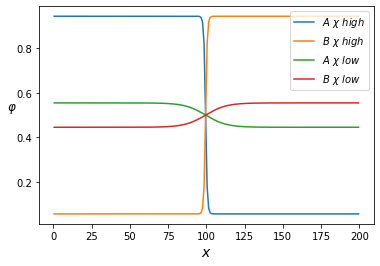

In [38]:

plt.plot(pro1.x,pro1.mon_A_phi,label=r'$A \ \chi \ high$')
plt.plot(pro1.x,pro1.mon_B_phi,label=r'$B \ \chi \ high$')
plt.plot(pro2.x,pro2.mon_A_phi,label=r'$A \ \chi \ low$')
plt.plot(pro2.x,pro2.mon_B_phi,label=r'$B \ \chi \ low$')
plt.xlabel("$x$",fontsize=14)
plt.ylabel(r'$\mathit{\varphi}$',fontsize=12,rotation=0)
plt.legend(loc='best')
plt.show()



In [48]:
kal=pd.read_csv("output/LL_.kal",sep='\t')
kal.head()

,mon_A_chi_B,sys_L_grand_potential,mol_A_width,mol_A_phi(1),mol_A_phibulk
0,0.80,0.125945,2.737345,0.945322,0.054678
1,0.79,0.121196,2.765758,0.942488,0.057512
2,0.78,0.116439,2.796037,0.939480,0.060520
3,0.77,0.111674,2.828365,0.936287,0.063714
4,0.76,0.106903,2.862951,0.932892,0.067108


In [62]:
A=kal['mol_A_phi(1)']
B=kal['mol_A_phibulk']
chi=kal['mon_A_chi_B']
kal["phi_1_phibulk"]=(A-B)

In [64]:
xx=kal.mol_A_phibulk[2]
B[2]
#chi[2]
#B[2]


0.06051977430104763

In [46]:
#kal.rename(columns={'phi_1_phibulk':'phi_1_min_phibulk'},inplace=True)
#kal.head()

In [ ]:

plt.plot(np.log(kal.mon_A_chi_B-0.5),np.log(kal.sys_L_grand_potential))
plt.xlabel(r'$\mathrm{ln} \chi$',fontsize=14)
plt.ylabel(r'$\mathrm{ln} \Omega$',fontsize=14,rotation=0)
plt.show()

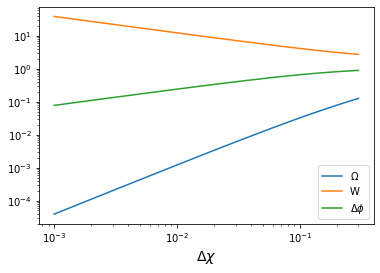

In [50]:
plt.loglog(kal.mon_A_chi_B-0.5,kal.sys_L_grand_potential,label=r'$\Omega$')
plt.loglog(kal.mon_A_chi_B-0.5,kal.mol_A_width,label='W')
plt.loglog(kal.mon_A_chi_B-0.5,kal.phi_1_phibulk,label=r'$\Delta \phi$')
plt.xlabel(r'$\Delta \chi$',fontsize=14)
#plt.ylabel(r'$\Omega$',fontsize=14,rotation=0)
plt.legend(loc="best")
plt.show()

In [51]:
kal.to_csv("LL_mod.kal",sep='\t',index=False)